In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
def transform_chromatic(image):
    """
    This function transforms an image to chromatic coordinates,
    which helps to compensate the effects of contrast changes
    
    :param image: numpy array which the image in RGB with shape (h, w, 3).
    :return: numpy array which the image converted to chromatic coordinates.
    """

    # Get the sum of all three colors per pixel
    summation = np.sum(image, axis=2)
    
    # Replace null vales by 0.01 to avoid runtime errors
    summation = summation + (summation == 0) * 0.01

    # Divide all pixels by the summation of all three colors
    return image / np.repeat(np.atleast_3d(summation), 3, axis=2)


In [3]:
def batch_process(function, paths, skip_fourt=True, size=(15, 10)):
    """
    This function processes a set of images with a given function and prints the comparison.
    
    :param function: the funtion used for processing the images.
    :param paths: list with the paths to the images to process.
    :param skip_fourth: whether the 4th layer of the images (brightness) should be neglected.
    :param size: the size of the final plot.
    """
    
    # Set the figure up
    f, axarr = plt.subplots(2, 3, figsize=size)
    for i, image_name in enumerate(paths):
        # Plot original image
        image = imageio.imread(image_name)
        axarr[0, i].imshow(image)

        # If there are 4 channels, discard the 4th (brightness)
        if image.shape[2] == 4:
            image = image[:,:,:3]

        # Process and plot the one in chromatic coordinates
        axarr[1, i].imshow(function(image))


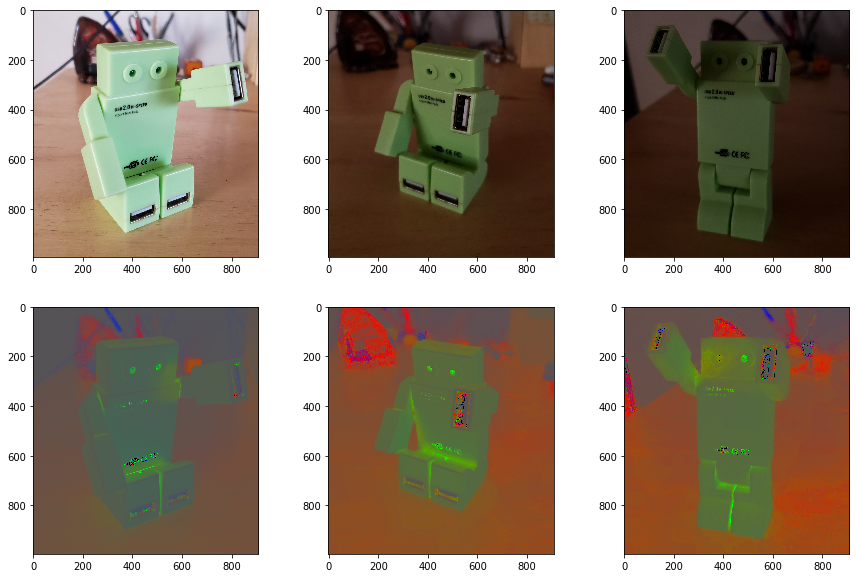

In [4]:
# Analize three images which different contrast
image_names = ['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']
batch_process(transform_chromatic, image_names)


In [5]:
def white_patch(image, bits=8):
    """
    This function implements the white-patch algorithm and returns the updated image
    
    :param image: numpy array which the image in RGB with shape (h, w, 3).
    :param bits: number of bits of the image:
    :return: numpy array which the image after being white patched.
    """
    
    # Get the normalization coefficients
    max_range = 2 ** bits - 1
    max_found = np.max(np.max(image, axis=0), axis=0)
    normalizer = max_range / max_found.reshape((1, 1, 3))
    
    # Normalize and return the image
    return (image * normalizer).astype(np.uint8)
    

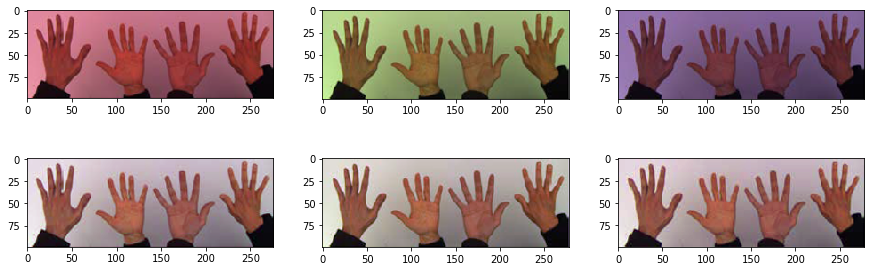

In [6]:
# Analize three images which different dominant colors
image_names = ['test_red.png', 'test_green.png', 'test_blue.png']
batch_process(white_patch, image_names, size=(15, 5))


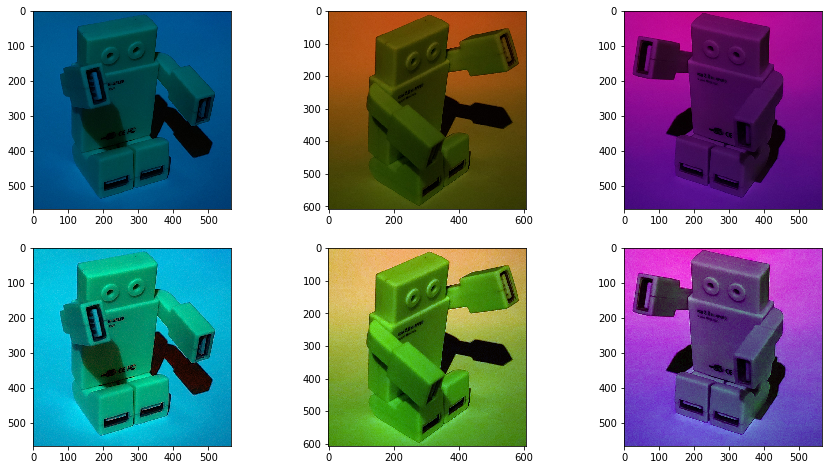

In [7]:
# Analize three images which different dominant colors
image_names = ['WP_B.png', 'WP_O.png', 'WP_R.png']
batch_process(white_patch, image_names, size=(15, 8))
